In [242]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Try with all other independent variables + connect to SS

In [244]:
# import the data from CSV
df = pd.read_csv('FCU22.8.csv', index_col=[0],
                  date_format="%Y-%m-%d %H:%M:%S +04")

# Reset the index to make the timestamp a column
df.reset_index(inplace=True)

# renaming column
df = df.rename(columns={df.columns[0]: "Timestamp"})
df = df.rename(columns={df.columns[1]: "Chilled Water Valve"})
df = df.rename(columns={df.columns[2]: "Space Temperature Sensor"})
# cleaning the columns column
df[df.columns[1]] = df[df.columns[1]].str.replace("%", "", regex=False)
df[df.columns[1]] = df[df.columns[1]].astype(float) / 100
df[df.columns[2]] = df[df.columns[2]].str.replace("°C", "", regex=False)
df[df.columns[2]] = round(df[df.columns[2]].astype(float), 2)  
df.head()

,Timestamp,Chilled Water Valve,Space Temperature Sensor
0,2024-03-19 00:00:00,0.0,22.4
1,2024-03-19 00:05:00,0.0,22.4
2,2024-03-19 00:10:00,0.0,22.3
3,2024-03-19 00:15:00,0.0,22.4
4,2024-03-19 00:20:00,0.0,22.4


<Axes: >

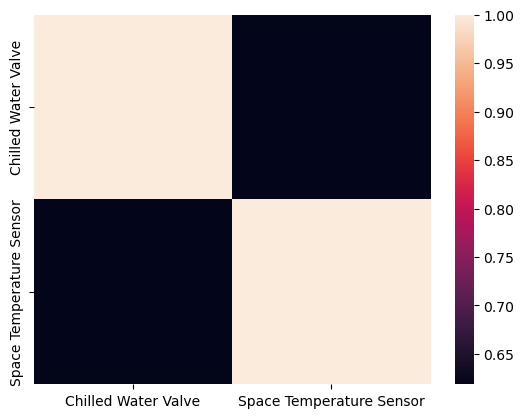

In [245]:
# Selecting relevant columns for correlation
df_corr = df[["Chilled Water Valve", "Space Temperature Sensor"]]
# Compute the correlation matrix
corr = df_corr.corr()
sns.heatmap(corr)

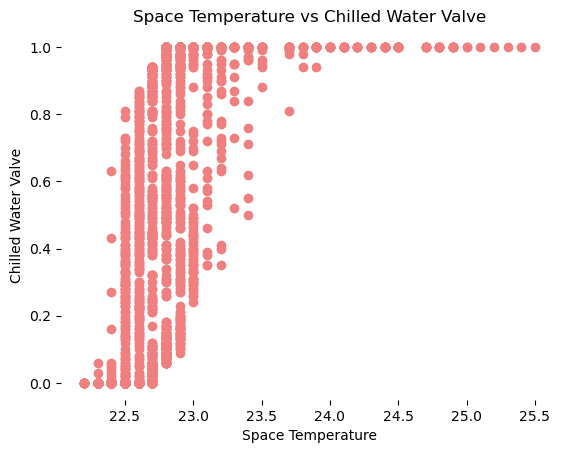

In [246]:
# Relationship between Temperature and Chilled Water Valve
plt.scatter(df['Space Temperature Sensor'], df['Chilled Water Valve'], color = 'lightcoral')
plt.title('Space Temperature vs Chilled Water Valve')
plt.xlabel('Space Temperature')
plt.ylabel('Chilled Water Valve')
plt.box(False)
plt.show()

In [247]:
# Splitting variables
X = df[["Chilled Water Valve"]]  # independent variable
y = df["Space Temperature Sensor"]  # dependent variable

In [248]:
#Split the data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [249]:
# Generate polynomial features
poly = PolynomialFeatures(degree = 4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train polynomial regression model on the whole dataset
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

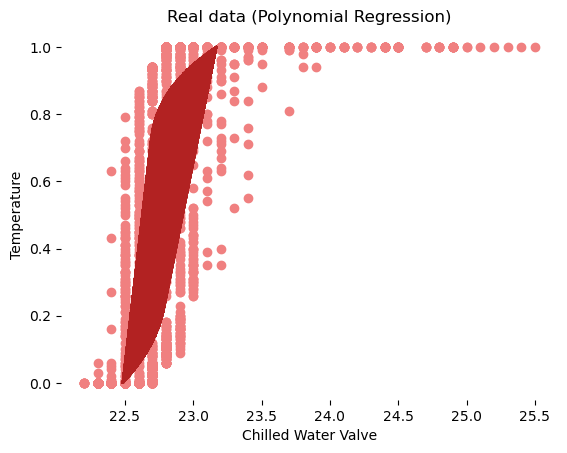

In [250]:
# Visualize real data with polynomial regression
X_grid = np.arange(min(y_train), max(y_train), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(y_train, X_train, color = 'lightcoral')
plt.plot(model.predict(X_train_poly), X_train,  color = 'firebrick')
plt.title('Real data (Polynomial Regression)')
plt.xlabel('Chilled Water Valve')
plt.ylabel('Temperature')
plt.box(False)
plt.show()

In [251]:
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.10725259750765952
Root Mean Squared Error: 0.32749442362834136
R^2 Score: 0.45824831771075925


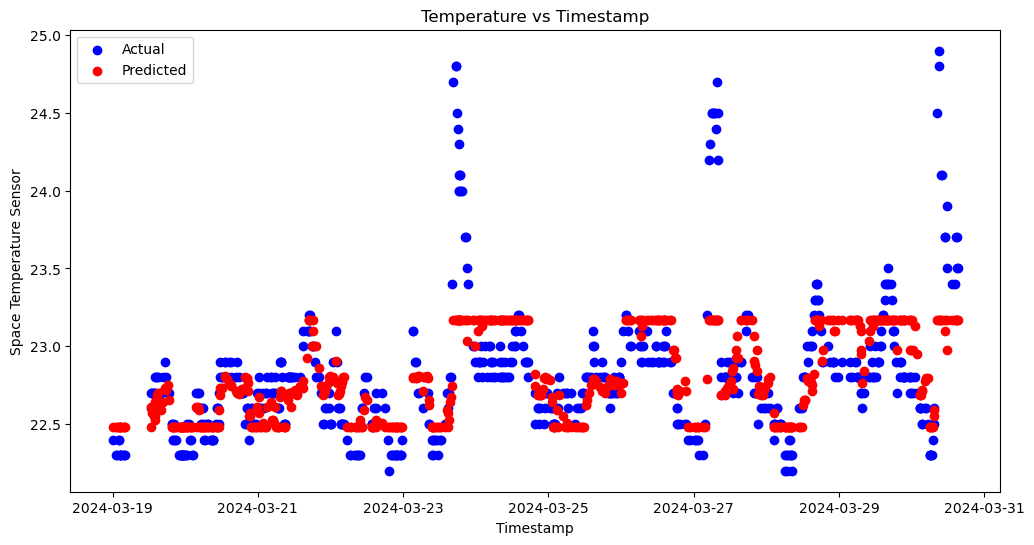

In [252]:
# Extract the timestamp for plotting
timestamp_test = df.loc[X_test.index, "Timestamp"]

# Plotting the results
plt.figure(figsize=(12, 6))
plt.scatter(timestamp_test, y_test, color='blue', label='Actual')
plt.scatter(timestamp_test, y_pred, color='red', label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Space Temperature Sensor')
plt.title('Temperature vs Timestamp')
plt.legend()
plt.show()


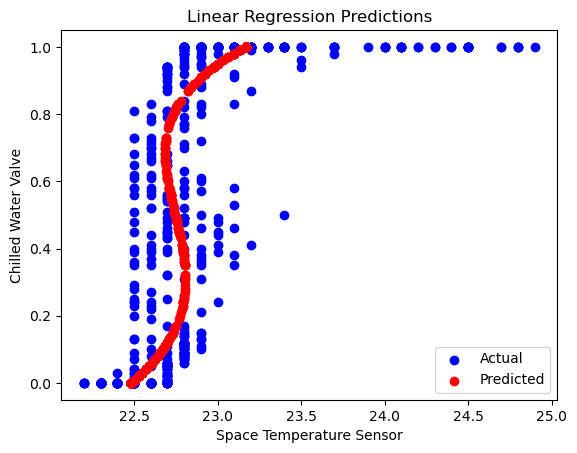

In [253]:
# Plotting the results
plt.scatter(y_test, X_test, color='blue', label='Actual')
plt.scatter(y_pred, X_test, color='red', label='Predicted')
plt.xlabel('Space Temperature Sensor')
plt.ylabel('Chilled Water Valve')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()